# **Trabalho Final**
### Algoritmos e Programação com Linguagem Python
---

**Orientações Gerais:**

* Esta é o trabalho final prático onde serão trabalhados conceitos 
apresentados e exercitados em sala de aula.

* Aspéctos como clareza e organização do código, comentários, raciocínio lógico, coerência no nome de variáveis, utilização das estruturas mais adequadas para a solução dos problemas e o funcionamento adequado serão analisados e irão compor o valor da nota final.

* Procure entender exatamente o que se pede antes de iniciar a codificação. Quando se sabe o que é necessário fazer, a codificação fica mais fácil, mais eficiente e mais divertida ;-).

* Faça o upload do notebook completo nomeado da seguinte forma: *nome_sobrenome_RA.ipynb*. 

* No caso de grupos, informar ao professor os membros de cada grupo e cada um deverá importar o arquivo no Canvas individualmente.

* Arquivos com nomes incorretos serão desconsiderados!

* Não deixem dúvidas para trás! Acessem os grupos combinados ou entrem em contato com o professor. 

✌ Sucesso o/






# RMS Titanic

O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte matando mais de 1500 pessoas, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.

Os destroços do Titanic foram procurados por décadas até serem encontrados em 1985 por uma equipe liderada por Robert Ballard. Ele se encontra a 3843 m de profundidade e a 650 km ao sudeste de Terra Nova no Canadá. Sua história e naufrágio permaneceram no imaginário popular durante décadas, levando a produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic de 1997. Até hoje o Titanic permanece como um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.

*Fonte:* [WikiPedia](https://pt.wikipedia.org/wiki/RMS_Titanic)

--------

A equipe da [Udacity](https://udacity.com) disponibilizou informações sobre uma parte dos passageiros à bordo do RMS Titanic no dia daquela tragédia. Esse _dataset_ que contém informações reais vem sendo utilizado em diversos estudos de caso, além de servir de base para aprendizado de Ciência de Dados, Estatística e Machine Learning.

O arquivo **titanic_data.csv** contém informações reais sobre os passageiros organizadas da seguinte forma:

- Survived (Sobreviveu): 0 = Não, 1 = Sim
- Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
- Sex (Sexo): Sexo do passageiro
- Age (Idade): Idade em anos
- Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
- Parch: Quantidade de pais / crianças a bordo do Titanic
- Ticket (Bilhete): Número do bilhete de embarque
- Fare (Tarifa): Tarifa paga pelo Passageiro
- Cabin (Cabine): Número de cabine
- Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

O objetivo deste estudo é obter algumas informações estatísticas sobre a tragédia e realizar alguns _insights_ a respeito dos tripulantes e das circunstâncias do acidente.

Efetue a carga do arquivo através da biblioteca _Pandas_ e a partir do _DataFrame_ gerado, efetue as operações necessárias para responder as questões.


## Importando o DataSet

1 - Efetuar a leitura do dataset através do Pandas, gerando um DataFrame de nome tit, levando-se em consideração que o arquivo encontra-se na mesma pasta do notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

!pip install plotly

#1  Efetuar a leitura do dataset através do Pandas, gerando um DataFrame de nome tit,
#   levando-se em consideração que o arquivo encontra-se na mesma pasta do notebook.
class FileKnowing():
  def __init__(self, file_name):
    self.tit = pd.read_csv(file_name)
    self.columns_null = []

#2  Quantas linhas e colunas tem o dataset? Quais os tipos das colunas?
  def count_RowsAndColumns(self):
    num_rows, num_columns = self.tit.shape
    print(f'The DataFrame has {num_rows} rows and {num_columns} columns.')

#2
  def show_ColumnsInfos(self):
    return self.tit.info()

#3  Mostre os dados dos dez primeiros e 8 últimos registros do dataset.
  def show_HeadDF(self):
    return self.tit.head(10)

#3
  def show_TailDF(self):
    return self.tit.tail(8)

#4  Cálculos envolvendo colunas numéricas com dados faltantes podem sofrer impacto. É possível afirmar se há dados faltantes no dataset?
#   Caso positivo, quais e quantos seriam esses dados? Preencha os dados faltantes de forma que não influenciem em operações futuras.
  def show_NullData(self):
    for column in self.tit.columns:
      num_null = self.tit[column].isnull().sum()
      if num_null > 0:
        self.columns_null.append(column)

    if len(self.columns_null) > 0:
      print(f'Yes, the dataset has {len(self.columns_null)} columns with null data {self.columns_null}')

#4
  def modify_NullData(self):
    for column in self.columns_null:
      if self.tit[column].dtype in (np.float64, np.int64):
        self.tit[column].fillna(self.tit[column].mean(), inplace=True)
      else:
        self.tit[column].fillna('N/D', inplace=True)

    return self.tit

#5  Uma vez que algumas colunas não serão utilizadas, eventualmente é melhor excluí-las para que não interfiram na análise.
#   Assim, exclua do dataset as colunas Sibsp, Parch e Ticket.
  def delete_Columns(self):
    self.tit = self.tit.drop(['SibSp', 'Parch', 'Ticket'], axis=1)

    return self.tit
    
#6  Renomear as colunas restantes para a lingua portuguesa,
#   utilizando os seguintes nomes de colunas: IdPassageiro, Sobreviveu, Classe, Nome, Sexo, Idade, Tarifa, Cabine e Embarque.
  def rename_Columns(self):
    new_names = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'Tarifa', 'Cabine', 'Embarque']
    old_names = list(self.tit.columns)

    for i in range(len(old_names)):
      self.tit = self.tit.rename(columns={old_names[i]: new_names[i]})

    return self.tit

#7  Alterar o conteudo da coluna Sobreviveu para: 0 => Não / 1 => Sim
  def change_SurvivedInfo(self):
    self.tit['Sobreviveu'].replace([0, 1], ['Não', 'Sim'], inplace=True)

    return self.tit

#8  Alterar o conteudo da coluna Sexo para: female => Mulher / male => Homem
  def change_SexInfo(self):
    self.tit['Sexo'].replace(['male', 'female'], ['Homem', 'Mulher'], inplace=True)
    
    return self.tit

#9  Quantas mulheres e quantos homems estavam à bordo, de acordo com o dataset?
  def count_Sex(self):
    self.num_mens = self.tit['Sexo'].value_counts()['Homem']
    self.num_womens = self.tit['Sexo'].value_counts()['Mulher']
    answer_numMensAndWomnes = f'Titanic had {self.num_mens} mens and {self.num_womens} womens on the ship that day.'
    
    return answer_numMensAndWomnes

#10 Quantos passageiros sobreviveram e quantos não sobreviveram?
  def count_SurvivedOrNot(self):
    self.num_survived = self.tit['Sobreviveu'].value_counts()['Sim']
    answer_SurvivedOrNot = f'The acident had {self.num_survived} survivors and {(self.num_mens+self.num_womens)-self.num_survived} deaths.'
    
    return answer_SurvivedOrNot

#11 Quantas mulheres não sobreviveram?
  def count_SurvivedBySex(self):
    self.num_womenSurvived = len(self.tit[(self.tit['Sexo'] == 'Mulher') & (self.tit['Sobreviveu'] == 'Sim')])
    self.num_menSurvived = len(self.tit[(self.tit['Sexo'] == 'Homem') & (self.tit['Sobreviveu'] == 'Sim')])  
    answer_womenDeaths = f'{self.num_womens-self.num_womenSurvived} womens died that day'   

    return answer_womenDeaths

#12 Proporcionalmente, sobreviveram mais homens ou mais mulheres? Cite as proporções
  def calculate_PercentSurvivedBySex(self):
    self.percent_womanSurvived = self.num_womenSurvived/self.num_womens
    percent_manSurvived = self.num_menSurvived/self.num_mens

    if self.percent_womanSurvived > percent_manSurvived:
      answer_mostSurvivorsBySexPercent = f'Womans survived more than mans in percetual. It was {self.percent_womanSurvived:.2%} womans in percent that survived. Mens survived only {percent_manSurvived:.2%}.'
    elif percent_manSurvived > self.percent_womanSurvived:
      answer_mostSurvivorsBySexPercent = f'Mans survived more than mans in percetual. It was {percent_manSurvived:.2%} mans in percent that survived. Womens survived only {self.percent_womanSurvived:.2%}.'

    return answer_mostSurvivorsBySexPercent

#13 Levando-se em consideração a idade dos passageiros, qual a idade e quantidade de pessoas com o maior número de mortos?
  def calculate_AgeWithMostDeaths(self):
    age_diedQuantity = self.tit[self.tit['Sobreviveu'] == 'Não']['Idade'].value_counts() #conta quantidade de idades de mortos
    most_deathAgeQuantity = self.tit[self.tit['Idade'] == age_diedQuantity.index[1]]['Idade'].value_counts() ##### # Índice igual a 1 para fugir da média de valores faltantes que é o que mais tem #####

    answer_AgeWithMostDeath = f'The age with the most deaths was {most_deathAgeQuantity.index[0]} years, with {most_deathAgeQuantity.values[0]} deaths in total.'

    return answer_AgeWithMostDeath

#14 Qual a média de idade dos homens sobreviventes?
  def calculate_averageSurvivorsMens(self):
    age_survivorsMens = self.tit.loc[(self.tit['Sexo'] == 'Homem') & (self.tit['Sobreviveu'] == 'Sim')] #seleciona a linha inteira
    average_survivorsMens = age_survivorsMens['Idade'].mean() #tira a média da coluna idade dos dados selecionados
    answer_averageSurvivorsMens = f'Mens survivors age average is {round(average_survivorsMens,2)} years'

    return answer_averageSurvivorsMens

#15 Levando-se em consideração passageiros prioritários (mulheres e crianças de até 15 anos independente do sexo)
#   qual a proporção de sobreviventes por sexo?
  def calculate_ProportionBySexPrioritareSurvivors(self):
    under15_SurvivorsMens = self.tit.loc[(self.tit['Sexo'] == 'Homem') & (self.tit['Sobreviveu'] == 'Sim') & (self.tit['Idade'] < 15)]
    under15_PassengersMens = self.tit.loc[(self.tit['Sexo'] == 'Homem') & (self.tit['Idade'] < 15)]
    proportion_SurvivorsMens = len(under15_SurvivorsMens)/len(under15_PassengersMens)

    answer_ProportionBySexPrioritareSurvivors = f'{self.percent_womanSurvived:.2%} womens survived and {proportion_SurvivorsMens:.2%} under-15 mens survived'

    return answer_ProportionBySexPrioritareSurvivors

#16 Qual a quantidade de passageiros por classe?
  def calculate_PassengersByClass(self):
    self.class_list = self.tit['Classe'].unique()
    for i in self.class_list:
      self.total_passengersByClass = self.tit[self.tit['Classe'] == i]['Classe'].count()
      print(f"Class {i} had {self.total_passengersByClass} passengers.")

#17 Qual o percentual de sobreviventes por classe?
  def calculate_PercentualSurvivorsByClass(self):
    total_SurvivorsByClass = self.tit[self.tit['Sobreviveu'] == 'Sim']['Classe'].value_counts()
    self.total_passengersByClass = self.tit['Classe'].value_counts()

    for j in self.class_list:
      print(f'Class {j} had {total_SurvivorsByClass[j]/self.total_passengersByClass[j]:.2%} survivors')

#18 Crie um dataframe que demonstre a quantidade de sobreviventes e não sobreviventes, agrupados por sexo e classe.
  def show_DataframeSurvivorsByClassAndSex(self):
    survivors_df = pd.pivot_table(data=self.tit, #DataFrame that has the data
                                 values='IdPassageiro', #Column to count
                                 index=['Sexo'], #Column that will be the index of the graphic
                                 columns=['Classe', 'Sobreviveu'], #Column to create the graphic
                                 aggfunc='count') #function to use count method
                                 
    return survivors_df
  
  def show_graphics(self):
    sns.countplot(y='Sexo', hue='Sobreviveu', data=self.tit)
    sns.catplot(x='Classe', hue='Sobreviveu', col='Sexo', data=self.tit, kind='count')

file_name = '/content/titanic_data.csv'
tit = FileKnowing(file_name)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Conhecendo o DataSet

2 - Quantas linhas e colunas tem o dataset? Quais os tipos das colunas?

In [2]:
tit.count_RowsAndColumns()

The DataFrame has 891 rows and 12 columns.


In [3]:
tit.show_ColumnsInfos()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3 - Mostre os dados dos dez primeiros e 8 últimos registros do dataset.

In [4]:
tit.show_HeadDF()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
tit.show_TailDF()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


4 - Cálculos envolvendo colunas numéricas com dados faltantes podem sofrer impacto. É possível afirmar se há dados faltantes no dataset? Caso positivo, quais e quantos seriam esses dados? Preencha os dados faltantes de forma que não influenciem em operações futuras.

In [6]:
tit.show_NullData()

Yes, the dataset has 3 columns with null data ['Age', 'Cabin', 'Embarked']


In [7]:
tit.modify_NullData()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N/D,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N/D,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N/D,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N/D,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N/D,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


## Adequando o DataSet

5 - Uma vez que algumas colunas não serão utilizadas, eventualmente é melhor excluí-las para que não interfiram na análise. Assim, exclua do dataset as colunas Sibsp, Parch e Ticket.

In [8]:
tit.delete_Columns()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,N/D,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,N/D,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,N/D,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,13.0000,N/D,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,23.4500,N/D,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,30.0000,C148,C


6 - Renomear as colunas restantes para a lingua portuguesa, utilizando os seguintes nomes de colunas: IdPassageiro, Sobreviveu, Classe, Nome, Sexo, Idade, Tarifa, Cabine e Embarque.

In [9]:
tit.rename_Columns()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,N/D,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,N/D,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,N/D,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,13.0000,N/D,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,23.4500,N/D,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,30.0000,C148,C


7 - Alterar o conteudo da coluna Sobreviveu para:
- 0 => Não
- 1 => Sim

In [10]:
tit.change_SurvivedInfo()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Tarifa,Cabine,Embarque
0,1,Não,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,N/D,S
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C85,C
2,3,Sim,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,N/D,S
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,C123,S
4,5,Não,3,"Allen, Mr. William Henry",male,35.000000,8.0500,N/D,S
...,...,...,...,...,...,...,...,...,...
886,887,Não,2,"Montvila, Rev. Juozas",male,27.000000,13.0000,N/D,S
887,888,Sim,1,"Graham, Miss. Margaret Edith",female,19.000000,30.0000,B42,S
888,889,Não,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,23.4500,N/D,S
889,890,Sim,1,"Behr, Mr. Karl Howell",male,26.000000,30.0000,C148,C


8 - Alterar o conteudo da coluna Sexo para:
- female => Mulher
- male   => Homem

In [11]:
tit.change_SexInfo()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Tarifa,Cabine,Embarque
0,1,Não,3,"Braund, Mr. Owen Harris",Homem,22.000000,7.2500,N/D,S
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mulher,38.000000,71.2833,C85,C
2,3,Sim,3,"Heikkinen, Miss. Laina",Mulher,26.000000,7.9250,N/D,S
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mulher,35.000000,53.1000,C123,S
4,5,Não,3,"Allen, Mr. William Henry",Homem,35.000000,8.0500,N/D,S
...,...,...,...,...,...,...,...,...,...
886,887,Não,2,"Montvila, Rev. Juozas",Homem,27.000000,13.0000,N/D,S
887,888,Sim,1,"Graham, Miss. Margaret Edith",Mulher,19.000000,30.0000,B42,S
888,889,Não,3,"Johnston, Miss. Catherine Helen ""Carrie""",Mulher,29.699118,23.4500,N/D,S
889,890,Sim,1,"Behr, Mr. Karl Howell",Homem,26.000000,30.0000,C148,C


## Alguns números

9 - Quantas mulheres e quantos homems estavam à bordo, de acordo com o dataset?

In [12]:
tit.count_Sex()

'Titanic had 577 mens and 314 womens on the ship that day.'

10 - Quantos passageiros sobreviveram e quantos não sobreviveram?

In [13]:
tit.count_SurvivedOrNot()

'The acident had 342 survivors and 549 deaths.'

11 - Quantas mulheres não sobreviveram?

In [14]:
tit.count_SurvivedBySex()

'81 womens died that day'

12 - Proporcionalmente, sobreviveram mais homens ou mais mulheres? Cite as proporções.

In [15]:
tit.calculate_PercentSurvivedBySex()

'Womans survived more than mans in percetual. It was 74.20% womans in percent that survived. Mens survived only 18.89%.'

13 - Levando-se em consideração a idade dos passageiros, qual a idade e quantidade de pessoas com o maior número de mortos?

In [16]:
tit.calculate_AgeWithMostDeaths()

'The age with the most deaths was 21.0 years, with 24 deaths in total.'

14 - Qual a média de idade dos homens sobreviventes?

In [17]:
tit.calculate_averageSurvivorsMens()

'Mens survivors age average is 27.63 years'

15 - Levando-se em consideração passageiros prioritários (mulheres e crianças de até 15 anos independente do sexo) qual a proporção de sobreviventes por sexo?

In [18]:
tit.calculate_ProportionBySexPrioritareSurvivors()

'74.20% womens survived and 53.85% under-15 mens survived'

16 - Qual a quantidade de passageiros por classe?

In [19]:
tit.calculate_PassengersByClass()

Class 3 had 491 passengers.
Class 1 had 216 passengers.
Class 2 had 184 passengers.


17 - Qual o percentual de sobreviventes por classe?

In [20]:
tit.calculate_PercentualSurvivorsByClass()

Class 3 had 24.24% survivors
Class 1 had 62.96% survivors
Class 2 had 47.28% survivors


18 - Crie um dataframe que demonstre a quantidade de sobreviventes e não sobreviventes, agrupados por sexo e classe.

In [21]:
tit.show_DataframeSurvivorsByClassAndSex()

Classe       1       2        3    
Sobreviveu Não Sim Não Sim  Não Sim
Sexo                               
Homem       77  45  91  17  300  47
Mulher       3  91   6  70   72  72

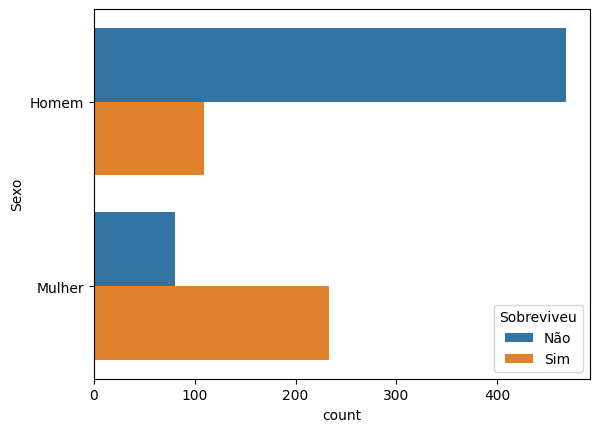

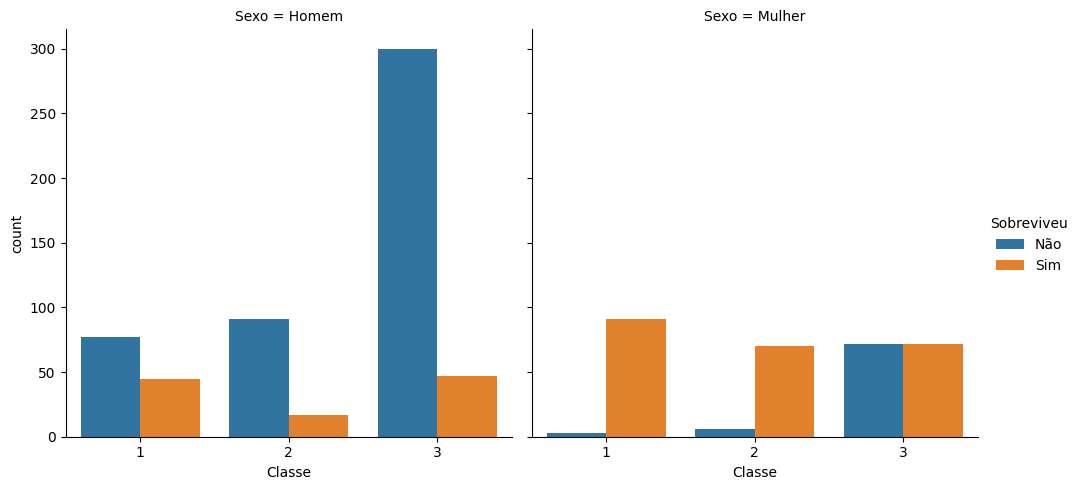

In [22]:
tit.show_graphics()